In [1]:
import pandas as pd
import numpy as np
from locale import normalize
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.utils.extmath import safe_sparse_dot
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt


colls = ['id','diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

dwdb = pd.read_csv('/content/drive/MyDrive/LA_PCA_Project/wdbc.data',names= colls)
dwdb

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


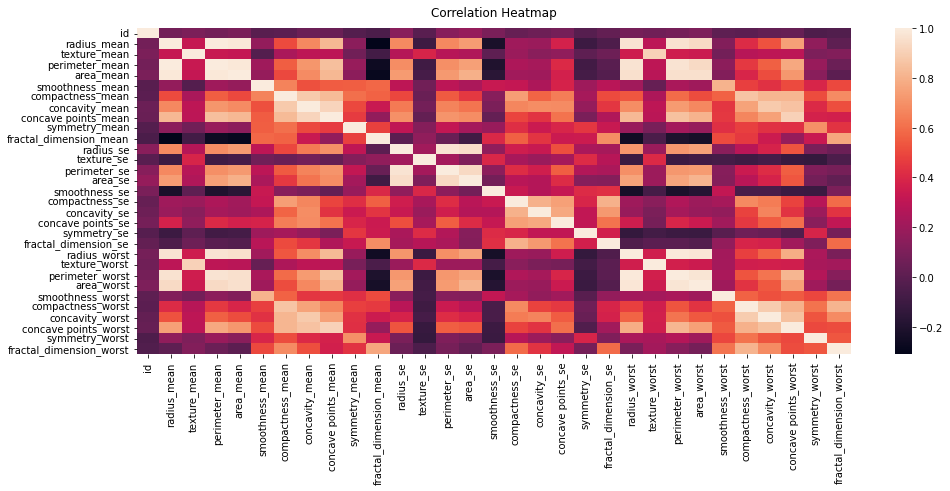

In [2]:
import seaborn as sns

plt.figure(figsize=(16, 6))
heatmap=sns.heatmap(dwdb.corr())
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [3]:
from sklearn.utils import extmath
from sklearn.preprocessing import StandardScaler, KernelCenterer
from sklearn.metrics.pairwise import euclidean_distances
def Kernal_cosine(x,n_components=2):
  dist = euclidean_distances(x, x, squared=True)
  K = np.exp(-0.01 * dist)
  Kc = KernelCenterer().fit_transform(K)
  print(Kc.shape)
    # Get eigenvalues and eigenvectors of the kernel matrix
  eig_vals, eig_vecs = np.linalg.eigh(Kc)
    
    # flip eigenvectors' sign to enforce deterministic output
  eig_vecs, _ = extmath.svd_flip(eig_vecs, np.empty_like(eig_vecs).T)
    
    # Concatenate the eigenvectors corresponding to the highest n_components eigenvalues
  Xkpca = np.column_stack([eig_vecs[:,-i] for i in range(1,n_components+1)])
 
  return Xkpca

In [4]:
x = dwdb.loc[:, ~dwdb.columns.isin(['id','diagnosis'])].to_numpy()
K = Kernal_cosine(x)


(569, 569)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  This is separate from the ipykernel package so we can avoid doing imports until


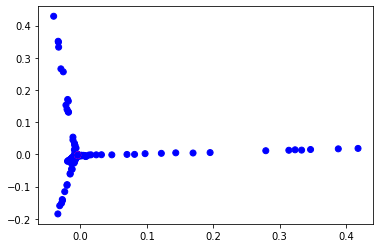

In [5]:
import matplotlib.pyplot as plt

plt.scatter(K[:,0],K[:,1],c = dwdb['diagnosis'])

In [6]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA(n_components=2)
#x=pca.fit_transform(new_data)

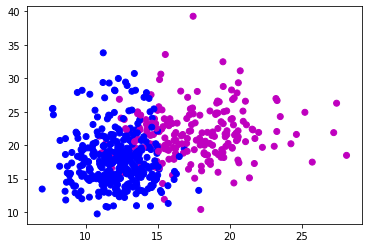

In [8]:
plt.scatter(x[:,0],x[:,1], c = dwdb['diagnosis'])

In [9]:
def pca(X,n_components=2):
  #X = normalize(X)
  cov = np.cov(X.T)
  print(cov.shape)
  eigen_values, eigen_vectors= np.linalg.eigh(cov)
  required_ev = eigen_vectors[:,-n_components:]
  for i in range(n_components):
    nm = np.linalg.norm(required_ev[:,i])
    required_ev[:,i]= ((1/nm)*required_ev[:,i])
  print(required_ev.shape)
  return np.matmul(required_ev.T,X.T),eigen_values

In [10]:
p,eg=pca(x)


(30, 30)
(30, 2)


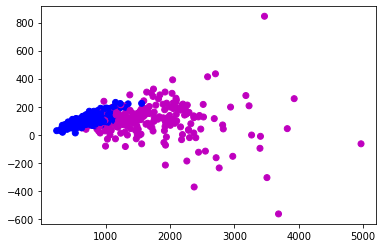

In [11]:
plt.scatter(p[1,:],p[0,:], c = dwdb['diagnosis'])

(array([29.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([7.01997261e-07, 4.43782605e+04, 8.87565210e+04, 1.33134782e+05,
        1.77513042e+05, 2.21891303e+05, 2.66269563e+05, 3.10647824e+05,
        3.55026084e+05, 3.99404345e+05, 4.43782605e+05]),
 <a list of 10 Patch objects>)

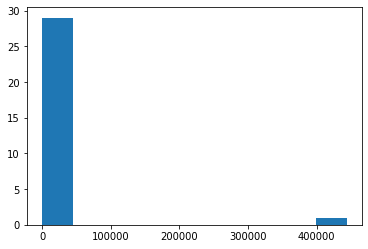

In [19]:
plt.hist(eg[::-1])

In [ ]:

def kernal_pca(X,n_components=2):
  #X = normalize(X)
  S = cosine_similarity(X.T, X.T)
  #S *= -1
  #S += 1
  #print(S.shape)
  #S= safe_sparse_dot(normalize(S).T, normalize(S))
  np.clip(S, 0, 2, out=S)
  cov = S
  eigen_values, eigen_vectors= np.linalg.eigh(cov)
  required_ev = eigen_vectors[:,-2:]
  for i in range(n_components):
    nm = np.linalg.norm(required_ev[:,i])
    required_ev[:,i]= ((1/nm)*required_ev[:,i])
  print(required_ev.shape)
  return np.matmul(required_ev.T,X.T), eigen_values

In [ ]:
k, eg_values=kernal_pca(x)
print(k.shape)
plt.scatter(k[1,:],k[0,:], c = dwdb['diagnosis'])

In [ ]:
eg_values

In [ ]:
def kernal_pca_rq(X,n_components=2):
  X = normalize(X)
  S = (1+np.matmul(X.T,X))**2
  cov = S
  eigen_values, eigen_vectors= np.linalg.eigh(cov)
  required_ev = eigen_vectors[:,-2:]
  for i in range(n_components):
    nm = np.linalg.norm(required_ev[:,i])
    required_ev[:,i]= ((1/nm)*required_ev[:,i])
  print(required_ev.shape)
  return np.matmul(required_ev.T,X.T), eigen_values



In [ ]:
k, eigen_values=kernal_pca_rq(x)
print(k.shape)
plt.scatter(k[1,:],k[0,:], c = dwdb['diagnosis'])

In [ ]:
plt.hist(eigen_values)